In [1]:
import cptac
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import matplotlib.patches as mpatches
import Delta_Correlation as dc

In [2]:
luad = cptac.Luad()

In [3]:
#sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

In [4]:
trans_norm_df = dc.get_prot_trans_df(luad)
trans_norm_df = trans_norm_df[trans_norm_df.Gene == 'TP53']
original_delta_corr = dc.delta_correlation(trans_norm_df)

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps\Delta_Correlation.py, line 23)
cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps\Delta_Correlation.py, line 33)


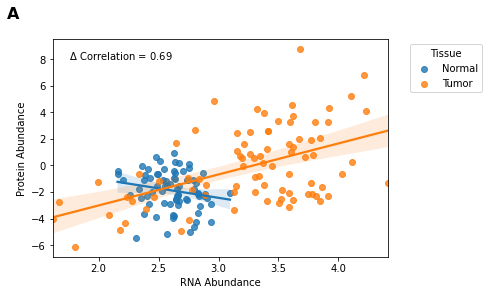

In [5]:
df = trans_norm_df
fig = sns.regplot(y = df[df.Tissue == 'Normal'].Proteomics, x = df[df.Tissue == 'Normal'].Transcriptomics, label= 'Normal')
fig = sns.regplot(y = df[df.Tissue == 'Tumor'].Proteomics, x = df[df.Tissue == 'Tumor'].Transcriptomics,  label = 'Tumor')
plt.legend(title = 'Tissue', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.set(xlabel='RNA Abundance', ylabel='Protein Abundance')
plt.text(-0.1, 1.15, 'A', transform = fig.transAxes, 
         fontsize = 16, fontweight = 'bold', va = 'top', ha = 'right')
plt.text(x = 1.75, y = 8, s = r'$\Delta$' + ' Correlation = ' + str(round(original_delta_corr,2)))
plt.savefig('Figures/Figure S3a) Original Correlation Plot.png', bbox_inches='tight')
plt.show()

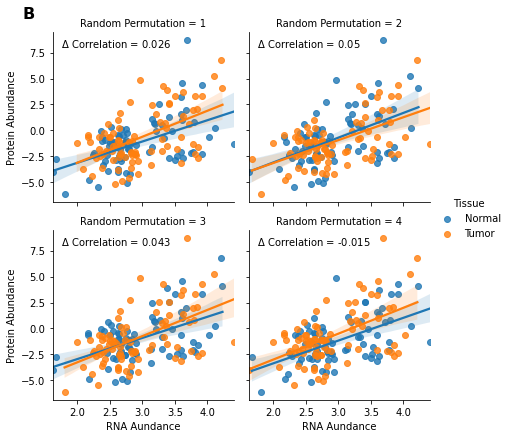

In [6]:
sample_permutation_df = []
for i in range(0,4):
    df = copy.deepcopy(trans_norm_df)
    df['Tissue'] = np.random.permutation(trans_norm_df['Tissue'])
    df['Random Permutation'] = [i+1] * len(df)
    df['delta_corr'] = [round(dc.delta_correlation(df), 3)] * len(df)
    sample_permutation_df.append(df)
    
sample_permutation_df = pd.concat(sample_permutation_df)
global first
first = True
def annotate(data, **kws):
    global first
    if first == True:
        ax = plt.gca()
        ax.text(-0.1, 1.15, 'B', transform = ax.transAxes, 
             fontsize = 16, fontweight = 'bold', va = 'top', ha = 'right')
    first = False
global used_axes
used_axes = []
global i 
i = 0
def annotate_delta_corr(delta_corr, **kws):
    ax = plt.gca()
    global i
    if ax not in used_axes:
        used_axes.append(ax)
        corr = delta_corr[i]
        i += 1
        ax.text(x = 1.75, y = 8, s = r'$\Delta$' + ' Correlation = ' + str(round(corr,3)))
correlations = pd.unique(sample_permutation_df.delta_corr) 
fig = sns.FacetGrid(data = sample_permutation_df, col = 'Random Permutation', col_wrap=2, hue = 'Tissue', legend_out = True, hue_order = ['Normal', 'Tumor'])
fig.map_dataframe(annotate)
fig.map_dataframe(sns.regplot, x = 'Transcriptomics', y = 'Proteomics')
fig.map_dataframe(annotate_delta_corr, delta_corr = correlations)
fig.add_legend()
fig.set_axis_labels('RNA Aundance', 'Protein Abundance')
plt.savefig('Figures/Figure S3B) Permuted Correlation Plots.png', bbox_inches='tight')
plt.show()

C:\Users\nanel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


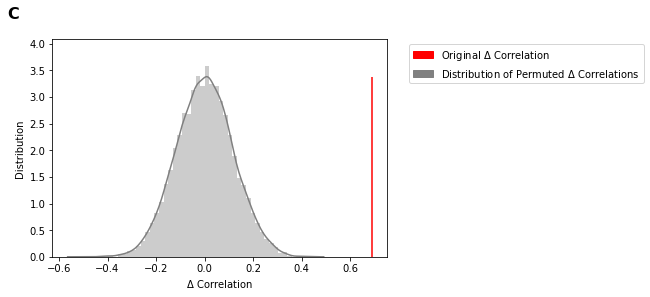

In [7]:
permutation_list = dc.permutate(trans_norm_df, return_perm_list=True)
fig = sns.distplot(permutation_list, color = 'grey')
#plt.show()
maxx = (max(fig.get_lines()[0].get_data()[1]))
plt.vlines(original_delta_corr, 0, maxx, color = 'red')
#fig= plt.plot([original_delta_corr, original_delta_corr], [0, maxx], color = "red")
red_patch = mpatches.Patch(color='red', label='Original '  + r'$\Delta$' +  ' Correlation')
grey_patch = mpatches.Patch(color='grey', label='Distribution of Permuted ' + r'$\Delta$' +  ' Correlations')
plt.ylim([0,maxx+.7])
plt.legend(handles=[red_patch,grey_patch], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(r'$\Delta$' + ' Correlation')
plt.ylabel('Distribution')
plt.text(-0.1, 1.15, 'C', transform = fig.transAxes, 
         fontsize = 16, fontweight = 'bold', va = 'top', ha = 'right')

plt.savefig('Figures/Figure S3C) Permutation Histogram.png', bbox_inches='tight')
plt.show()